# Processing Movies from the IMDb Datasets

Within this Jupyter Notebook, my objective is to load and manipulate the official data obtained from the renowned movie and TV show database, IMDb. The data utilized in this project is derived directly from the official IMDb database, ensuring its accuracy as of 06/29/2023. The datasets will be filtered to exclusively include information pertaining to movies, actors associated with those movies, and the genres attributed to each film.

See descriptions of each table loaded as Pandas dataframes below. To view more information about the datasets, see the [official IMDb datasets](https://developer.imdb.com/non-commercial-datasets/).

___

## Table of Contents

1. [Loading and Viewing Raw Data](#loading-and-viewing-raw-data)
2. [Handling Null Values](#handling-null-values)
3. [title.basics Cleaning and Validation](#title.basics-cleaning-and-validation)
4. [title.principals Cleaning and Validation](#title.principals-cleaning-and-validation)
5. [names.basics Cleaning and Validation](#names.basics-cleaning-and-validation)
6. [Filtering Tables with title.akas](#filtering-tables-with-titles.akas)
7. [Resulting Tables and Exporting as CSVs](#resulting-tables)

___

<a name="loading-and-viewing-raw-data"></a>
## Loading and Viewing Raw Data

Before beginning the data validation and cleaning process, we will first import the datasets from the IMDb website and examine the tables' contents/relationships.

### Importing Datasets as Dataframes

In [1]:
# import libraries
import pandas as pd
import numpy as np

In [2]:
titles_path = r"C:\Users\weism\OneDrive\life stuff\Personal Projects\imdb database analysis\title.basics.tsv"
names_path = r"C:\Users\weism\OneDrive\life stuff\Personal Projects\imdb database analysis\name.basics.tsv"
principals_path = r"C:\Users\weism\OneDrive\life stuff\Personal Projects\imdb database analysis\title.principals.tsv"
ratings_path = r"C:\Users\weism\OneDrive\life stuff\Personal Projects\imdb database analysis\title.ratings.tsv"
title_akas_path = r"C:\Users\weism\OneDrive\life stuff\Personal Projects\imdb database analysis\title.akas.tsv"

In [4]:
# Load data from "name.basics.tsv" and save as "names_df"
names_df = pd.read_csv(names_path, delimiter="\t")

In [5]:
# Load data from "title.principals.tsv" and save as "principals_df"
principals_df = pd.read_csv(principals_path, delimiter="\t")

In [6]:
# Load data from "title.ratings.tsv" and save as "ratings_df"
ratings_df = pd.read_csv(ratings_path, delimiter="\t")

In [7]:
# Load data from "title.basics.tsv" and save as "titles_df"
titles_df = pd.read_csv(titles_path, delimiter="\t")

C:\Users\weism\AppData\Local\Temp\ipykernel_19244\646418532.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  titles_df = pd.read_csv(titles_path, delimiter="\t")


In [8]:
akas_df = pd.read_csv(title_akas_path, delimiter="\t")

C:\Users\weism\AppData\Local\Temp\ipykernel_19244\768172551.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  akas_df = pd.read_csv(title_akas_path, delimiter="\t")


---
<a id="original_er_model"></a>
### Original ER Model

See the original structure of the IMDb datasets. The tables and descriptions showcased here are directly obtained from the IMDb website, reflecting the original structure of the tables without any alterations. The following diagram represents my interpretation of the datasets.

Please note that not all tables from the IMDb website were included in this representation. Only the tables deemed relevant for my specific analysis were extracted. For a comprehensive view of the available tables, you please refer to the [official IMDb datasets](https://developer.imdb.com/non-commercial-datasets/).

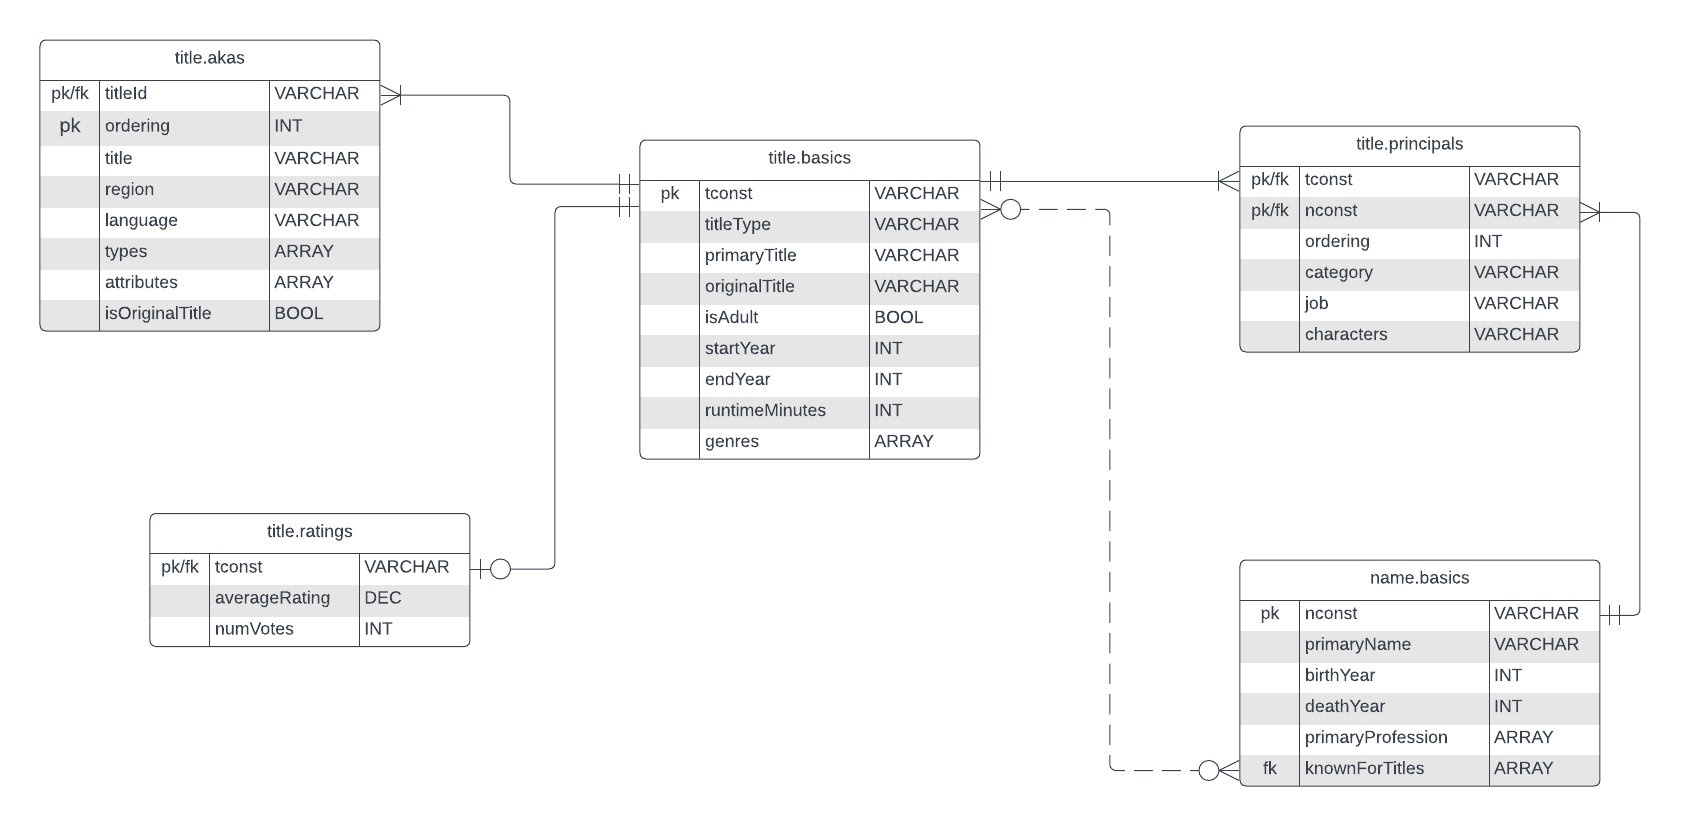

---

### Tables and Descriptions

#### title.basics
Data related to all titles in IMDB database. Includes movies, tv show episodes, live action plays, etc.

__Columns__

- tconst (string) - alphanumeric unique identifier of the title
- titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
- primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
- originalTitle (string) - original title, in the original language
- isAdult (boolean) - 0: non-adult title; 1: adult title
- startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year.
- endYear (YYYY) – TV Series end year. ‘\N’ for all other title types
- runtimeMinutes – primary runtime of the title, in minutes
- genres (string array) – includes up to three genres associated with the title

In [9]:
# Sample Output
titles_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


#### name.basics
Data related to all individuals who have participated in the production of a title. Includes actors, writers, producers, directors, costume designers, etc.

__Columns__
- nconst (string) - alphanumeric unique identifier of the name/person
- primaryName (string)– name by which the person is most often credited
- birthYear – in YYYY format
- deathYear – in YYYY format if applicable, else '\N'
- primaryProfession (array of strings)– the top-3 professions of the person
- knownForTitles (array of tconsts) – titles the person is known for

In [10]:
names_df.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0031983,tt0072308,tt0053137,tt0050419"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0075213,tt0038355,tt0037382,tt0117057"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0057345,tt0056404,tt0054452,tt0049189"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0080455,tt0072562,tt0077975,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050976,tt0050986,tt0069467,tt0083922"


#### title.principals
Mapping table between the name.basics table and title.basics table. A record exists for every individual involved in a title.


__Columns__
- tconst (string) - alphanumeric unique identifier of the title
- ordering (integer) – a number to uniquely identify rows for a given titleId
- nconst (string) - alphanumeric unique identifier of the name/person
- category (string) - the category of job that person was in
- job (string) - the specific job title if applicable, else '\N'
- characters (string) - the name of the character played if applicable, else '\N'

In [11]:
principals_df.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N


#### title.ratings
Contains the average rating and number of votes for records in the "titles" Table. This is a one-to-one optional relationship, meaning an individual title could have a max of one record in the "ratings" table, but could not have one as well. Since this is a one-to-one relationship, these two tables should be combined.


__Columns__
- tconst (string) - alphanumeric unique identifier of the title
- averageRating (decimal) – weighted average of all the individual user ratings
- numVotes (integer) - number of votes the title has received

In [12]:
ratings_df.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1982
1,tt0000002,5.8,265
2,tt0000003,6.5,1839
3,tt0000004,5.5,178
4,tt0000005,6.2,2625


#### title.akas

Contains all alternative titles for a local region/country for each unique record in "title.basics" table.

__Columns__

- titleId (string) - a tconst, an alphanumeric unique identifier of the title
- ordering (integer) – a number to uniquely identify rows for a given titleId
- title (string) – the localized title
- region (string) - the region for this version of the title
- language (string) - the language of the title
- types (array) - Enumerated set of attributes for this alternative title. One or more of the following: "alternative", "dvd", "festival", "tv", "video", "working", - "original", "imdbDisplay". New values may be added in the future without warning
- attributes (array) - Additional terms to describe this alternative title, not enumerated
- isOriginalTitle (boolean) – 0: not original title; 1: original title

In [14]:
akas_df.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0


___

<a name="handling-null-values"></a>
## Handling Null Values

Before proceeding with the validation and cleaning of individual dataframes, it is necessary to address the values represented by "\N" in the dataset, indicating null values. We will replace these "\N" values with actual null values using the pd.NA function and a regular expression. To efficiently handle large dataframes, we will utilize a generator along with a list comprehension to complete this task.

In [15]:
# Create list of dataframes.
dfs_list = [ratings_df, names_df, principals_df, titles_df, akas_df]

# Create a generator object.
nulls_gen = (df.replace(r'^\\N$', pd.NA, regex=True) for df in dfs_list)

# Iterate through generator using a list comprehension and assign new dataframe contents back to respective variables.
ratings_df, names_df, principals_df, titles_df, akas_df = [df for df in nulls_gen]

---
<a name="title.basics-cleaning-and-validation"></a>
## title.basics Cleaning and Validation


### Sample Output and Dataframe Information

In [18]:
titles_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,<NA>,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,<NA>,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,<NA>,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,<NA>,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,<NA>,1,"Comedy,Short"


In [19]:
titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9966186 entries, 0 to 9966185
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 684.3+ MB


### "tconst" Column Validation/Cleaning and Joining with "title.ratings"
As mentioned earlier, it seems possible to merge the "title.basics" and "title.ratings" tables since they appear to have a one-to-one relationship. To confirm this, we need to check the uniqueness of rows in both tables. Once confirmed, we can perform a left join, using "title.basics" as the left table, to ensure that no titles without ratings are excluded.

Additionally, to enhance clarity, we will rename the "tconst" column to "movie_id" for a more meaningful representation.

In [20]:
# Verify uniqueness and ensure no nulls of "tconst" in titles_df
titles_df["tconst"].nunique() == titles_df.shape[0]

True

In [21]:
# Verify uniqueness  and ensure no nulls of "tconst" in ratings_df
ratings_df["tconst"].nunique() == ratings_df.shape[0]

True

In [22]:
# Check to see if all titles have a rating. It can be seen that not all titles have a rating. 
# meaning left join is necessary to combine.
print("count of titles: ", titles_df.shape[0])
print("count of ratings: ", ratings_df.shape[0])

count of titles:  9966186
count of ratings:  1324473


In [23]:
# Combine the two dataframes as "titles_ratings_df"
titles_ratings_df = pd.merge(titles_df, ratings_df, on='tconst', how='left')

In [24]:
# Ensure no lost titles or duplicates resulting from join and view result of join. No issues noted.
print(titles_ratings_df.shape[0] == titles_df.shape[0])
titles_ratings_df.head()

True


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,<NA>,1,"Documentary,Short",5.7,1982.0
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,<NA>,5,"Animation,Short",5.8,265.0
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,<NA>,4,"Animation,Comedy,Romance",6.5,1839.0
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,<NA>,12,"Animation,Short",5.5,178.0
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,<NA>,1,"Comedy,Short",6.2,2625.0


In [25]:
# Rename "tconst" as "movie_id"
titles_ratings_df = titles_ratings_df.rename(columns={"tconst": "movie_id"})

### "title_type" Column Validation/Cleaning

In this step, we will examine the various types of titles present in the "title.basics" table. However, since we are specifically interested in box-office movies, any records that appear to be related to non-movies will be eliminated. Once the non-movie titles have been removed, we can safely drop the "title_type" column. The resulting filtered dataframe will be renamed as "movies_df" to reflect its focus on movies.

In [26]:
# View different types of titles. We will only keep films with titleType of "movie"
titles_ratings_df["titleType"].unique()

array(['short', 'movie', 'tvShort', 'tvMovie', 'tvSeries', 'tvEpisode',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame', 'tvPilot'],
      dtype=object)

In [27]:
# Only keep rows with "movie" value
# Renames as "movies_df"
movies_df = titles_ratings_df[titles_ratings_df["titleType"] == "movie"]

In [29]:
# Drop "titleType"
movies_df.drop("titleType", axis=1, inplace=True)

In [31]:
movies_df.head()

,movie_id,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
8,tt0000009,Miss Jerry,Miss Jerry,0,1894,<NA>,45,Romance,5.3,206.0
144,tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,<NA>,100,"Documentary,News,Sport",5.3,475.0
498,tt0000502,Bohemios,Bohemios,0,1905,<NA>,100,<NA>,4.1,15.0
570,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,<NA>,70,"Action,Adventure,Biography",6.0,832.0
587,tt0000591,The Prodigal Son,L'enfant prodigue,0,1907,<NA>,90,Drama,4.4,20.0


### "primaryTitle"/"originalTitle" Columns Validation/Cleaning

The "primaryTitle" and "originalTitle" columns in the dataset both provide information about the title associated with each record. Upon examination, these columns appear to contain mostly identical values. Further research confirms that "primaryTitle" is the more commonly recognized and frequently used title. Therefore, we will retain only the "primaryTitle" column and rename it as "movie_title" for better clarity.

Furthermore, as part of the validation process, we will check for any duplicate entries within the "movie_title" column.

In [32]:
# See how many primaryTitles match originalTitles. Can be seen that most match, will drop originaTitle.
print("match: ", (movies_df["primaryTitle"] == movies_df["originalTitle"]).sum())
print("total: ", movies_df["primaryTitle"].notnull().sum())

match:  568278
total:  649399


In [34]:
# Drop originalTitle
movies_df.drop("originalTitle", axis=1, inplace=True)

In [36]:
# Check for duplicates. Many noted.
movies_df["primaryTitle"].duplicated().sum()

88964

In [37]:
# View duplicate films of first 3 to try to understand why these exist. 
# All appear to be different version of the same title, so we will keep all.
dupl_titles = movies_df.loc[movies_df["primaryTitle"].duplicated(keep="first"),
                               "primaryTitle"][:3]
for title in dupl_titles:
    print(movies_df[movies_df["primaryTitle"] == title].head(10))

        movie_id primaryTitle isAdult startYear endYear runtimeMinutes genres  \
625    tt0000630       Hamlet       0      1908    <NA>           <NA>  Drama   
1228   tt0001240       Hamlet       0      1911    <NA>           <NA>  Drama   
2895   tt0002922       Hamlet       0      1913    <NA>             64  Drama   
4006   tt0004049       Hamlet       0      1914    <NA>           <NA>  Drama   
7932   tt0008040       Hamlet       0      1917    <NA>           <NA>  Drama   
12076  tt0012249       Hamlet       0      1921    <NA>            131  Drama   
39716  tt0040416       Hamlet       0      1948    <NA>            154  Drama   
46217  tt0047060       Hamlet       0      1954    <NA>           <NA>  Drama   
57020  tt0058126       Hamlet       0      1964    <NA>            140  Drama   
57067  tt0058174       Hamlet       0      1964    <NA>            120  Drama   

       averageRating  numVotes  
625              2.8      26.0  
1228             3.8      22.0  
2895     

In [38]:
# Rename "primaryTitle" as "title"
movies_df = movies_df.rename(columns={"primaryTitle": "movie_title"})
movies_df.head()

,movie_id,movie_title,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
8,tt0000009,Miss Jerry,0,1894,<NA>,45,Romance,5.3,206.0
144,tt0000147,The Corbett-Fitzsimmons Fight,0,1897,<NA>,100,"Documentary,News,Sport",5.3,475.0
498,tt0000502,Bohemios,0,1905,<NA>,100,<NA>,4.1,15.0
570,tt0000574,The Story of the Kelly Gang,0,1906,<NA>,70,"Action,Adventure,Biography",6.0,832.0
587,tt0000591,The Prodigal Son,0,1907,<NA>,90,Drama,4.4,20.0


### "isAdult" Column Validation/Cleaning

The "isAdult" column serves as a boolean indicator, tagging each title as either having an adult rating or not. To ensure the correctness of the column, we will validate its boolean nature, check for any null values, and subsequently remove any titles where the "isAdult" value is true. Additionally, we will drop the entire "isAdult" column from the dataset.

In [39]:
# Appears to be a boolean column. Confirm this by generating distinct values.
# Note, some columns are stored as integers while others are stored as string.
# No nulls noted.
movies_df["isAdult"].unique()

array([0, 1, '0', '1'], dtype=object)

In [40]:
# Convert to Boolean datatype and drop all where True
movies_df["isAdult"] = movies_df["isAdult"].astype(bool)
movies_df = movies_df[movies_df["isAdult"] == False]
movies_df.drop("isAdult", axis=1, inplace=True)

In [41]:
# Success
movies_df.head()

,movie_id,movie_title,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
8,tt0000009,Miss Jerry,1894,<NA>,45,Romance,5.3,206.0
144,tt0000147,The Corbett-Fitzsimmons Fight,1897,<NA>,100,"Documentary,News,Sport",5.3,475.0
498,tt0000502,Bohemios,1905,<NA>,100,<NA>,4.1,15.0
570,tt0000574,The Story of the Kelly Gang,1906,<NA>,70,"Action,Adventure,Biography",6.0,832.0
587,tt0000591,The Prodigal Son,1907,<NA>,90,Drama,4.4,20.0


### "startYear"/"endYear" Column Validation/Cleaning

The "startYear" and "endYear" columns provide information about the release timeframe of the titles. In the context of movies, the "startYear" column represents the year of the initial release. Since the "endYear" column is not applicable to movies and contains only null values, we will remove it from the dataset.

Since we are concerned with movies currently released, we will filter out any movies with a "startYear" in the future or with a null value (many unreleased films do not yet have a release date). Additionally, to align with our focus on movies, we will consider the "startYear" column as the release year and rename it as "release_year" for better clarity and understanding.

In [42]:
# Ensure no endYears. None found.
movies_df["endYear"].notnull().sum()

0

In [43]:
# Drop endYear
movies_df.drop("endYear", axis=1, inplace=True)

In [44]:
# Ensure all startYear values are numeric. No non-numerics found
movies_df.loc[(movies_df["startYear"].notnull()) &
              (~movies_df["startYear"].astype(str).str.isnumeric()), "startYear"].sum()

0

In [45]:
# Convert to integer and perform sanity check. Some films appear to be have startYear after current year.
movies_df["startYear"] = movies_df["startYear"].astype(pd.Int64Dtype())
movies_df["startYear"].agg(["min","max"])

min    1894
max    2031
Name: startYear, dtype: int64

In [46]:
# Select random titles 200 index positions apart and research.
# Found that all are films in production. Will drop any unreleased movies
movies_production = movies_df[movies_df["startYear"] > 2023]
movies_production[::200].reset_index(drop=True).head()

,movie_id,movie_title,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0306104,Mom,2024,<NA>,<NA>,NaN,NaN
1,tt14539740,Godzilla x Kong: The New Empire,2024,<NA>,"Action,Adventure,Sci-Fi",NaN,NaN
2,tt21958386,Community: The Movie,2024,<NA>,Comedy,NaN,NaN
3,tt27164637,Dreams of the Afterlife,2024,<NA>,Drama,NaN,NaN
4,tt28036589,Spines,2024,90,Horror,NaN,NaN


In [47]:
# Drop unreleased movies
drop_ids = np.array(movies_production["movie_id"])
movies_df.drop(movies_df[movies_df["movie_id"].isin(drop_ids)].index, inplace=True)

In [48]:
# Success
movies_df["startYear"].agg(["min","max"])

min    1894
max    2023
Name: startYear, dtype: int64

In [50]:
# Select movies without a release date
# Many of these films are small independent films with little information known or films in production.
# All will be dropped
no_date = movies_df[movies_df["startYear"].isnull()]
no_date.reset_index(drop=True)[::200].head()

,movie_id,movie_title,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0021123,The March of Time,<NA>,<NA>,Musical,NaN,NaN
200,tt0459225,Capa,<NA>,<NA>,"Biography,Drama,History",NaN,NaN
400,tt0815158,Everything Changes,<NA>,<NA>,Drama,NaN,NaN
600,tt0983947,"Kicked, Bitten and Scratched",<NA>,<NA>,"Comedy,Romance",NaN,NaN
800,tt10036486,When We Were Live,<NA>,<NA>,Documentary,NaN,NaN


In [51]:
# Drop movies without a startYear
movies_df.drop(no_date.index, inplace=True)

In [52]:
# Rename column as "releaseYear"
movies_df = movies_df.rename(columns={"startYear":"release_year"})

In [53]:
movies_df.head()

,movie_id,movie_title,release_year,runtimeMinutes,genres,averageRating,numVotes
8,tt0000009,Miss Jerry,1894,45,Romance,5.3,206.0
144,tt0000147,The Corbett-Fitzsimmons Fight,1897,100,"Documentary,News,Sport",5.3,475.0
498,tt0000502,Bohemios,1905,100,<NA>,4.1,15.0
570,tt0000574,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",6.0,832.0
587,tt0000591,The Prodigal Son,1907,90,Drama,4.4,20.0


### "runtimeMinutes" Column Validation/Cleaning

The "runtimeMinutes" column represents the length of each title in minutes. It is expected to contain integer values and can also include null values. To ensure the integrity of the data, we will validate that the "runtimeMinutes" column consists of only integer values. Additionally, we will rename the column as "length_minutes" for better clarity and understanding.

In [54]:
# Check for non-numerics. None found.
(movies_df["runtimeMinutes"].notnull() & ~movies_df["runtimeMinutes"].astype(str).str.isnumeric()).sum()

0

In [55]:
# Convert to integer
movies_df["runtimeMinutes"] = movies_df["runtimeMinutes"].astype(pd.Int64Dtype())

In [56]:
movies_df = movies_df.rename(columns={"runtimeMinutes": "length_minutes"})

In [57]:
movies_df.head()

,movie_id,movie_title,release_year,length_minutes,genres,averageRating,numVotes
8,tt0000009,Miss Jerry,1894,45,Romance,5.3,206.0
144,tt0000147,The Corbett-Fitzsimmons Fight,1897,100,"Documentary,News,Sport",5.3,475.0
498,tt0000502,Bohemios,1905,100,<NA>,4.1,15.0
570,tt0000574,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",6.0,832.0
587,tt0000591,The Prodigal Son,1907,90,Drama,4.4,20.0


### "genres" Column Validation/Cleaning and Creation of "genres" and "movie_genres" Tables

The "genres" column consists of genres represented as a string, with multiple genres separated by commas. To facilitate further analysis, we need to convert this column into a list format.

By converting the "genres" column into a list, we can subsequently explode the column to create two additional tables: "genres" and "movie_genres". The "genres" table will contain all unique genres, while the "movie_genres" table will serve as a mapping table, capturing all genres associated with each title.

During this process, we will also ensure that all genres listed are valid, eliminating any inconsistencies or invalid genre entries.

In [58]:
# Split column by "," and convert to list
movies_df["genres"] = movies_df["genres"].str.split(",")
movies_df.head()

,movie_id,movie_title,release_year,length_minutes,genres,averageRating,numVotes
8,tt0000009,Miss Jerry,1894,45,[Romance],5.3,206.0
144,tt0000147,The Corbett-Fitzsimmons Fight,1897,100,"[Documentary, News, Sport]",5.3,475.0
498,tt0000502,Bohemios,1905,100,<NA>,4.1,15.0
570,tt0000574,The Story of the Kelly Gang,1906,70,"[Action, Adventure, Biography]",6.0,832.0
587,tt0000591,The Prodigal Son,1907,90,[Drama],4.4,20.0


In [66]:
# Check unique values to ensure all genre values make sense. No issues noted.
movies_df["genres"].explode().unique()

array(['Romance', 'Documentary', 'News', 'Sport', <NA>, 'Action',
       'Adventure', 'Biography', 'Drama', 'Fantasy', 'Comedy', 'War',
       'Crime', 'Family', 'History', 'Sci-Fi', 'Thriller', 'Western',
       'Mystery', 'Horror', 'Music', 'Animation', 'Musical', 'Film-Noir',
       'Reality-TV', 'Talk-Show', 'Game-Show', 'Short'], dtype=object)

In [67]:
# Explode movies_df and save as movies_df_xd
movies_df_xd = movies_df.explode("genres")

In [68]:
# Success
movies_df_xd.head()

,movie_id,movie_title,release_year,length_minutes,genres,averageRating,numVotes
8,tt0000009,Miss Jerry,1894,45,Romance,5.3,206.0
144,tt0000147,The Corbett-Fitzsimmons Fight,1897,100,Documentary,5.3,475.0
144,tt0000147,The Corbett-Fitzsimmons Fight,1897,100,News,5.3,475.0
144,tt0000147,The Corbett-Fitzsimmons Fight,1897,100,Sport,5.3,475.0
498,tt0000502,Bohemios,1905,100,<NA>,4.1,15.0


In [69]:
# Keep only "movie_id" and "genres" (i.e., genre name) as "movie_genres_df". 
# Will replace genre names with ids after creating "genres" table.
movie_genres_df = movies_df_xd.loc[movies_df_xd["genres"].notnull(), ["movie_id", "genres"]].reset_index(drop=True)

In [70]:
# Create "genres" table with distinct genres names as column "genre_name"
# Save as "genres_df"
genres_df = pd.DataFrame(movie_genres_df["genres"].unique(), columns=["genre_name"])

In [71]:
# Generate an id column using index + 1
ids_col = genres_df.index + 1

In [72]:
ids_col

RangeIndex(start=1, stop=28, step=1)

In [73]:
# Create new column "genre_id"
genres_df["genre_id"] = ids_col

In [74]:
# Reorder columns
genres_df = genres_df[["genre_id", "genre_name"]]

In [75]:
genres_df.head()

,genre_id,genre_name
0,1,Romance
1,2,Documentary
2,3,News
3,4,Sport
4,5,Action


In [76]:
# Currently have the name of the genre in the "movie_genres" table. Need to replace with id. 
movie_genres_df.head()

,movie_id,genres
0,tt0000009,Romance
1,tt0000147,Documentary
2,tt0000147,News
3,tt0000147,Sport
4,tt0000574,Action


In [77]:
# But first, check rows before and then after. Should not lose any.
movie_genres_df.shape[0]

748285

In [78]:
# Assign genre_id to movie_genres_df
movie_genres_df = pd.merge(movie_genres_df, genres_df, left_on="genres", right_on="genre_name")

In [79]:
movie_genres_df.head()

,movie_id,genres,genre_id,genre_name
0,tt0000009,Romance,1,Romance
1,tt0001175,Romance,1,Romance
2,tt0001475,Romance,1,Romance
3,tt0002026,Romance,1,Romance
4,tt0002211,Romance,1,Romance


In [80]:
# Rows the same, successful id assignment.
movie_genres_df.shape[0]

748285

In [81]:
# Drop "genres" from movie_genres_df
movie_genres_df.drop(["genres", "genre_name"], axis=1, inplace=True)

In [82]:
# Success
movie_genres_df.head()

,movie_id,genre_id
0,tt0000009,1
1,tt0001175,1
2,tt0001475,1
3,tt0002026,1
4,tt0002211,1


In [83]:
# Now drop genres column from movies_df since we now have seperate tables "movie_genres" and "genres"
movies_df.drop("genres", axis=1, inplace=True)

In [84]:
movies_df.head()

,movie_id,movie_title,release_year,length_minutes,averageRating,numVotes
8,tt0000009,Miss Jerry,1894,45,5.3,206.0
144,tt0000147,The Corbett-Fitzsimmons Fight,1897,100,5.3,475.0
498,tt0000502,Bohemios,1905,100,4.1,15.0
570,tt0000574,The Story of the Kelly Gang,1906,70,6.0,832.0
587,tt0000591,The Prodigal Son,1907,90,4.4,20.0


### "averageRating' Column Validation/Cleaning

The "averageRating" column is extracted from the "title.ratings" table. Each value in this column should be a float with one decimal point and is nullable. The presence of a value in this column should only occur when the corresponding "numVotes" column is not null.

As part of the validation and cleaning steps, we will ensure that the "averageRating" column adheres to the expected float format and one decimal point precision. We will also verify that a value is present in this column only when the corresponding "numVotes" column is not null.

To enhance clarity and understanding, we will rename the column to "avg_rating".

In [85]:
# Float datatype indicates no non-null, non-numeric values.
movies_df["averageRating"].dtype

dtype('float64')

In [86]:
# Ensure no values where "numVotes" is null. None found.
(movies_df["averageRating"].notnull() & movies_df["numVotes"].isnull()).sum()

0

In [87]:
# Round any floats that could be longer than one decimal place.
movies_df["averageRating"] = round(movies_df["averageRating"], 1)

In [88]:
# Rename column as "avg_rating"
movies_df = movies_df.rename(columns={"averageRating": "avg_rating"})

### "numVotes" Column Validation/Cleaning
The "numVotes" column is extracted from the "title.ratings" table. It should consist of integer values or null values. If a value is present in the "numVotes" column, the corresponding "avg_rating" column should also have a value.

As part of the validation steps, we will ensure that the "numVotes" column contains valid integer values or null values. Additionally, we will rename the column as "num_ratings" to improve clarity and understanding.

In [89]:
# Saved as float, this should be able to converted to an integer.
movies_df["numVotes"].dtype

dtype('float64')

In [90]:
# Check to see if any non-nulls are true floats or integer values saved as floats.
# No true floats found.
movies_df[movies_df["numVotes"].notnull() & movies_df["numVotes"] % 1 != 0]

,movie_id,movie_title,release_year,length_minutes,avg_rating,numVotes


In [91]:
# Convert to integer
movies_df["numVotes"] = movies_df["numVotes"].astype(pd.Int64Dtype())

In [92]:
# Ensure no cases where there are votes but no average rating. None found.
(movies_df["numVotes"].notnull() & movies_df["avg_rating"].isnull()).sum()

0

In [93]:
# Rename column as "num_ratings"
movies_df = movies_df.rename(columns={"numVotes": "num_ratings"})

In [94]:
# Reset index
movies_df.reset_index(drop=True, inplace=True)

In [95]:
movies_df.head()

,movie_id,movie_title,release_year,length_minutes,avg_rating,num_ratings
0,tt0000009,Miss Jerry,1894,45,5.3,206
1,tt0000147,The Corbett-Fitzsimmons Fight,1897,100,5.3,475
2,tt0000502,Bohemios,1905,100,4.1,15
3,tt0000574,The Story of the Kelly Gang,1906,70,6.0,832
4,tt0000591,The Prodigal Son,1907,90,4.4,20


---
<a name="title.principals-cleaning-and-validation"></a>
## title.principals Cleaning and Validation

### Sample Output and Dataframe Information

In [96]:
principals_df.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,<NA>,"[""Self""]"
1,tt0000001,2,nm0005690,director,<NA>,<NA>
2,tt0000001,3,nm0374658,cinematographer,director of photography,<NA>
3,tt0000002,1,nm0721526,director,<NA>,<NA>
4,tt0000002,2,nm1335271,composer,<NA>,<NA>


In [97]:
principals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56893253 entries, 0 to 56893252
Data columns (total 6 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   tconst      object
 1   ordering    int64 
 2   nconst      object
 3   category    object
 4   job         object
 5   characters  object
dtypes: int64(1), object(5)
memory usage: 2.5+ GB


### Filtering and Dropping Columns from Table
To narrow down the focus to movies and relevant cast members, we will perform an inner join between this table and the properly filtered "title.basics" table. Furthermore, we will filter the "category" column to include only actors, as they are the members of the cast we are interested in.

In addition, we will limit the columns in the resulting table to only "tconst" and "nconst", as the remaining columns contain information beyond the scope of our analysis and are not required for our current objectives.

In [98]:
# Perform inner join and name new table "movie_cast_df"
movie_cast_df = pd.merge(principals_df, movies_df["movie_id"], left_on="tconst", right_on="movie_id")

In [99]:
movie_cast_df.head()

,tconst,ordering,nconst,category,job,characters,movie_id
0,tt0000009,1,nm0063086,actress,<NA>,"[""Miss Geraldine Holbrook (Miss Jerry)""]",tt0000009
1,tt0000009,2,nm0183823,actor,<NA>,"[""Mr. Hamilton""]",tt0000009
2,tt0000009,3,nm1309758,actor,<NA>,"[""Chauncey Depew - the Director of the New Yor...",tt0000009
3,tt0000009,4,nm0085156,director,<NA>,<NA>,tt0000009
4,tt0000147,1,nm0179163,self,<NA>,"[""Self""]",tt0000147


In [100]:
# View unique categories
movie_cast_df["category"].unique()

array(['actress', 'actor', 'director', 'self', 'producer', 'writer',
       'cinematographer', 'composer', 'production_designer', 'editor',
       'archive_footage', 'archive_sound'], dtype=object)

In [101]:
# Filter for only categories of "actor" and "actress"
movie_cast_df = movie_cast_df[movie_cast_df["category"].isin(["actor", "actress"])]

In [102]:
# Keep only necessary columns
movie_cast_df = movie_cast_df[["tconst", "nconst"]]

In [103]:
# Find any duplicates. Two instances found
duplicate_cast = movie_cast_df.loc[movie_cast_df.duplicated(subset=["tconst", "nconst"])]
duplicate_cast

,tconst,nconst
3199446,tt28070634,nm13945168
4118928,tt9466810,nm7662612


In [104]:
# Drop duplicates
movie_cast_df.drop(duplicate_cast.index, inplace=True)

In [105]:
#Success
movie_cast_df.loc[movie_cast_df.duplicated(subset=["tconst", "nconst"])]

,tconst,nconst


In [106]:
movie_cast_df.head()

,tconst,nconst
0,tt0000009,nm0063086
1,tt0000009,nm0183823
2,tt0000009,nm1309758
11,tt0000502,nm0215752
12,tt0000502,nm0252720


### "tconst" Column Validation and Cleaning
The "tconst" column serves as an identifier for titles and acts as a foreign key for the "tconst" column in the "title.basics" table. As we have performed an inner join with the "movies" table, we have retained only valid title IDs. Null values have been filtered out, and duplicates are expected due to the nature of the relationship.

No further validation is required for the "tconst" column. However, we will make a change to align with the column name in the "title.basics" table for consistency and clarity.

In [107]:
movie_cast_df = movie_cast_df.rename(columns={"tconst": "movie_id"})

### "nconst" Validation and Cleaning
The "nconst" column serves as an identifier for all individuals involved in a title and acts as a foreign key for the "nconst" column in the "name.basics" table. The only validation required for this column is to ensure that all IDs are present in the "names" table, establishing the relationship between the two tables.

We will rename this column as "actor_id" for better clarity and alignment with the "name.basics" table.

In [108]:
# Join movie_cast_df with names_df with indicator=True. Can see that some cast members are not present in the names table.
movie_cast_df = pd.merge(movie_cast_df, names_df["nconst"], how="left", indicator=True)
movie_cast_df[movie_cast_df["_merge"].isin(["left_only"])].head()

,movie_id,nconst,_merge
1018795,tt13118286,nm11909805,left_only
1082120,tt14369286,nm11351714,left_only
1202539,tt17639060,nm13651546,left_only
1285184,tt21194816,nm14456371,left_only
1287890,tt21249434,nm13835284,left_only


In [109]:
# Drop rows where "nconst" value is not present in names table and drop "_merge"
movie_cast_df = movie_cast_df.loc[movie_cast_df["_merge"] != "left_only", :]
movie_cast_df.drop("_merge", axis=1, inplace=True)

In [110]:
# Success
pd.merge(movie_cast_df, names_df["nconst"], how="left", indicator=True)["_merge"].isin(["left_only"]).sum()

0

In [111]:
# Rename as "actor_id"
movie_cast_df = movie_cast_df.rename(columns={"nconst": "actor_id"})

In [112]:
# View result of cleaning/validation
movie_cast_df.head()

,movie_id,actor_id
0,tt0000009,nm0063086
1,tt0000009,nm0183823
2,tt0000009,nm1309758
3,tt0000502,nm0215752
4,tt0000502,nm0252720


---
<a name="names.basics-cleaning-and-validation"></a>
## names.basics Cleaning and Validation

### Sample Output and Dataframe Information

In [113]:
names_df.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0031983,tt0072308,tt0053137,tt0050419"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0075213,tt0038355,tt0037382,tt0117057"
2,nm0000003,Brigitte Bardot,1934,<NA>,"actress,soundtrack,music_department","tt0057345,tt0056404,tt0054452,tt0049189"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0080455,tt0072562,tt0077975,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050976,tt0050986,tt0069467,tt0083922"


In [114]:
names_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12645912 entries, 0 to 12645911
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   nconst             object
 1   primaryName        object
 2   birthYear          object
 3   deathYear          object
 4   primaryProfession  object
 5   knownForTitles     object
dtypes: object(6)
memory usage: 578.9+ MB


### Filtering and Dropping Columns From Table 
To focus solely on the names of actors present in the "title.principals" table, we can generate a list of unique cast members from that table. Then, we can filter the current table based on the resulting list, naming the resulting dataframe as "actors_df".

Furthermore, as all individuals in this filtered table are actors in some capacity, we can drop the "primaryProfession" column, as it provides redundant information.

In [115]:
# Get distinct actors from movie_cast_df
dist_actors = movie_cast_df["actor_id"].unique()
dist_actors

array(['nm0063086', 'nm0183823', 'nm1309758', ..., 'nm8594703',
       'nm10041459', 'nm13233318'], dtype=object)

In [116]:
# Filter names_df based on list of distinct actors and save result as new dataframe "actors_dfs"
actors_df = names_df[names_df["nconst"].isin(dist_actors)]

In [118]:
# Drop "primaryProfession"
actors_df.drop("primaryProfession", axis=1, inplace=True)

### "nconst" Column Validation/Cleaning
The "nconst" column serves as a unique identifier for each individual involved in a title production. Since we have already filtered out any values not present in the "title.principals" table, we only need to check for duplicates within this column.

Additionally, we will rename the column as "name_id" to align with the column name in the "title.principals" table and maintain consistency throughout the dataset.

In [120]:
# Ensure no duplicates. None found
actors_df["nconst"].duplicated().sum()

0

In [121]:
actors_df = actors_df.rename(columns={"nconst": "actor_id"})

### "primaryName" Column Validation/Cleaning
The "primaryName" column contains the names of the individuals involved in the title production. To ensure data integrity, we will validate this column by checking for null values and non-string data.

Additionally, we will rename the column as "actor_name" for improved clarity and alignment with the nature of the data, focusing on actors.

In [122]:
# Check for nulls, none found
actors_df["primaryName"].isnull().sum()

0

In [123]:
# Check for non-string data, 1 found.
numeric_names = actors_df[actors_df["primaryName"].astype(str).str.isnumeric()]
numeric_names

,actor_id,primaryName,birthYear,deathYear,knownForTitles
4552405,nm13842527,5,<NA>,<NA>,tt14050766


In [124]:
# Drop names that are of only non-numeric data
# Need to also drop from movie_cast_df
actors_df.drop(numeric_names.index, inplace=True)
movie_cast_df.drop(movie_cast_df[movie_cast_df["actor_id"].isin(numeric_names["actor_id"])].index, inplace=True)

In [125]:
# Check for very short and very long names
min_len, max_len = (actors_df["primaryName"].str.len()).agg(["min", "max"])
print(f"min length: {min_len}")
print(f"max length: {max_len}")

min length: 1
max length: 60


In [126]:
# Investigate very short names. Some of these are legitimate and should not be dropped.
actors_df.loc[actors_df["primaryName"].str.len() == (min_len + 1)]

,actor_id,primaryName,birthYear,deathYear,knownForTitles
180628,nm0190246,AZ,<NA>,<NA>,"tt1232776,tt0118798,tt0119988,tt0172726"
990809,nm10074191,Ak,<NA>,<NA>,tt8898054
1445341,nm10563057,Kc,<NA>,<NA>,tt10056452
1549429,nm10673204,Tj,<NA>,<NA>,tt10290886
1660046,nm10789724,Ao,<NA>,<NA>,"tt5980818,tt9533638"
1846990,nm10985296,Ty,<NA>,<NA>,tt10953132
2841177,nm12018405,Jo,<NA>,<NA>,tt13358538
2848839,nm12026451,Lw,<NA>,<NA>,"tt15554634,tt15554674,tt13376200"
3207062,nm1240342,GQ,1976,<NA>,"tt0316732,tt0462504,tt0161083,tt0303933"
3293066,nm1249301,Ua,1972,<NA>,"tt0363060,tt0332706,tt2287687,tt0997147"


In [127]:
# Some of these appear to be legitimate and relevant as well. Will keep all.
actors_df.loc[actors_df["primaryName"].str.len() == min_len]

,actor_id,primaryName,birthYear,deathYear,knownForTitles
2817900,nm11993934,B,<NA>,<NA>,tt13303020
4449414,nm13729550,V,<NA>,<NA>,tt20765128
6767726,nm2853599,Q,<NA>,<NA>,tt16291030
9673058,nm6229009,V,1995,<NA>,"tt5646594,tt11239552"
10052271,nm6726659,Y,<NA>,<NA>,"tt0044298,tt11645314,tt5837558,tt9799386"
12499209,nm9822617,G,<NA>,<NA>,tt8383584


In [128]:
# Investigate very long names. After research, have determined that these are valid rows. Will keep.
actors_df.loc[actors_df["primaryName"].str.len() >= (max_len - 10)]

,actor_id,primaryName,birthYear,deathYear,knownForTitles
1881925,nm11021049,Gitte Netterstrøm Apotheker Gitte Netterstrøm ...,<NA>,<NA>,"tt11015448,tt11061464"
6839580,nm2934450,The Mindanao State University Darangan Cultura...,<NA>,<NA>,tt0344067


In [132]:
# Rename "primaryName" as "actor_name"
actors_df = actors_df.rename(columns={"primaryName": "actor_name"})
actors_df.head()

,actor_id,actor_name,birthYear,deathYear,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"tt0031983,tt0072308,tt0053137,tt0050419"
1,nm0000002,Lauren Bacall,1924,2014,"tt0075213,tt0038355,tt0037382,tt0117057"
2,nm0000003,Brigitte Bardot,1934,<NA>,"tt0057345,tt0056404,tt0054452,tt0049189"
3,nm0000004,John Belushi,1949,1982,"tt0080455,tt0072562,tt0077975,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"tt0050976,tt0050986,tt0069467,tt0083922"


### "birthYear"/"deathYear" Column Validation/Cleaning
The "birthYear" and "deathYear" columns contain information about the birth and death years of individuals, if applicable. We will investigate for any invalid or extreme values in these columns to ensure data integrity. 

Additionally, we will convert the column names to snakecase ("birth_year" and "death_year") for consistency.

In [133]:
# Identify any non-numeric, non-null data. None found.
actors_df[(actors_df["birthYear"].notnull() & ~actors_df["birthYear"].astype(str).str.isnumeric()) |
         (actors_df["birthYear"].notnull() & ~actors_df["birthYear"].astype(str).str.isnumeric())]

,actor_id,actor_name,birthYear,deathYear,knownForTitles


In [134]:
# Convert to integer
actors_df[["birthYear", "deathYear"]] = actors_df[["birthYear", "deathYear"]].astype(pd.Int64Dtype())

In [135]:
# Ensure all extreme values are valid. Birthyear of one seems suspicious, will indestigate below.
actors_df[["birthYear", "deathYear"]].agg(["min", "max"])

,birthYear,deathYear
min,13,1800
max,2016,2023


In [136]:
# Given all deathYears are 4 digit numbers, we would expect the same for all birthYears. Found 2 records with suspicious birthYears (and min value from above).
actors_df[actors_df["birthYear"].astype(str).str.len() != 4]

,actor_id,actor_name,birthYear,deathYear,knownForTitles
5674559,nm1620433,Karen Abercrombie,13,<NA>,"tt8180386,tt7383268,tt3832914,tt6791350"
11672068,nm8810146,Paul Walsh,21,<NA>,"tt0093223,tt0314567,tt0098878,tt0083839"


In [137]:
# Researched found proper birth year values. Will correct below.
k_aber_index = 5674559
p_walsh_index = 11672068
actors_df.loc[k_aber_index, "birthYear"] = 1956
actors_df.loc[p_walsh_index, "birthYear"] = 1951

In [138]:
# Ensure no birthYears after deathYear. One found.
invalid_deathYear = actors_df.loc[actors_df["birthYear"] > actors_df["deathYear"]]

In [139]:
invalid_deathYear

,actor_id,actor_name,birthYear,deathYear,knownForTitles
3917750,nm13159045,Omri Barel,1999,1987,"tt2394876,tt2418644"


In [140]:
# After research, this row can be dropped. Drop from actors_df and movie_cast_df.
drop_id = invalid_deathYear.reset_index(drop=True).at[0, "actor_id"]
actors_df.drop(index=invalid_deathYear.index, inplace=True)
movie_cast_df.drop(index=movie_cast_df[movie_cast_df["actor_id"] == drop_id].index, inplace=True)

In [141]:
# Rename columns
actors_df = actors_df.rename(columns={"birthYear": "birth_year", "deathYear": "death_year"})

In [142]:
actors_df.head()

,actor_id,actor_name,birth_year,death_year,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"tt0031983,tt0072308,tt0053137,tt0050419"
1,nm0000002,Lauren Bacall,1924,2014,"tt0075213,tt0038355,tt0037382,tt0117057"
2,nm0000003,Brigitte Bardot,1934,<NA>,"tt0057345,tt0056404,tt0054452,tt0049189"
3,nm0000004,John Belushi,1949,1982,"tt0080455,tt0072562,tt0077975,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"tt0050976,tt0050986,tt0069467,tt0083922"


### "knownForTitles" Column Validation/Cleaning

The "knownForTitles" column contains string values representing a list of movie IDs separated by commas. To process this column:

1. Convert the string values to a list format.
2. Explode the column to create separate rows for each movie ID.
3. Filter out non-movie titles to retain only movies.
4. Later, add a boolean column called "known_for" in the "title.principals" table.
5. Drop the "knownForTitles" column from the "name.basics" table.

These steps will transform the "knownForTitles" column, filter non-movie titles, and incorporate the information into the "title.principals" table with a new "known_for" boolean column indicating whether an actor is well known any given roll in a movie.

In [143]:
actors_df.head()

,actor_id,actor_name,birth_year,death_year,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"tt0031983,tt0072308,tt0053137,tt0050419"
1,nm0000002,Lauren Bacall,1924,2014,"tt0075213,tt0038355,tt0037382,tt0117057"
2,nm0000003,Brigitte Bardot,1934,<NA>,"tt0057345,tt0056404,tt0054452,tt0049189"
3,nm0000004,John Belushi,1949,1982,"tt0080455,tt0072562,tt0077975,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"tt0050976,tt0050986,tt0069467,tt0083922"


In [144]:
# Convert knowForTitles to a list
actors_df["knownForTitles"] = actors_df["knownForTitles"].str.split(",")

In [145]:
# Explode column and save as actors_xd_df
actors_xd_df = actors_df.explode("knownForTitles")
actors_xd_df.head()

,actor_id,actor_name,birth_year,death_year,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,tt0031983
0,nm0000001,Fred Astaire,1899,1987,tt0072308
0,nm0000001,Fred Astaire,1899,1987,tt0053137
0,nm0000001,Fred Astaire,1899,1987,tt0050419
1,nm0000002,Lauren Bacall,1924,2014,tt0075213


In [146]:
# Filter out any titles that are not movies by selecting distinct movies from movies_df
dist_movies = movies_df["movie_id"].unique()
dist_movies

array(['tt0000009', 'tt0000147', 'tt0000502', ..., 'tt9916706',
       'tt9916730', 'tt9916754'], dtype=object)

In [147]:
# Perform filtering
actors_xd_df = actors_xd_df[actors_xd_df["knownForTitles"].isin(dist_movies)]

In [148]:
# Merge this dataframe with movie_cast to include knownForTitles in "title.principals" table.
cast_known_df = pd.merge(movie_cast_df, actors_xd_df[["actor_id", "knownForTitles"]], 
                        left_on=["movie_id", "actor_id"], right_on=["knownForTitles", "actor_id"],
                        how="left", suffixes=["_cast", "_actors"], indicator=True)

In [149]:
# Convert knownForTitles to boolean column where notnull = True and null = False
cast_known_df["knownForTitles"] = cast_known_df["knownForTitles"].notnull()

In [150]:
# Drop "_merge" and rename column to "isKnownFor"
cast_known_df.drop("_merge", axis=1, inplace=True)
cast_known_df = cast_known_df.rename(columns={"knownForTitles": "isKnownFor"})

In [151]:
# Ensure no rows were lost in this process
cast_known_df.shape[0] == movie_cast_df.shape[0]

True

In [152]:
#Update movie_cast_df with cast_known_df
movie_cast_df = cast_known_df

In [153]:
# rename column as known_for
movie_cast_df = movie_cast_df.rename(columns={"isKnownFor": "known_for"})

In [154]:
# movie_cast_df successfully updated with "isKNownFor" stored as boolean
print(movie_cast_df.head())
print()
print(movie_cast_df.dtypes)

    movie_id   actor_id  known_for
0  tt0000009  nm0063086       True
1  tt0000009  nm0183823       True
2  tt0000009  nm1309758       True
3  tt0000502  nm0215752       True
4  tt0000502  nm0252720       True

movie_id     object
actor_id     object
known_for      bool
dtype: object


In [155]:
# Drop knownFortitles from actors_df
actors_df.drop("knownForTitles", axis=1, inplace=True)

---

<a name="filtering-tables-with-titles.akas"></a>
## Filtering Tables with titles.akas

All the necessary data for loading into the PostgreSQL database has been appropriately cleaned and validated. However, this database contains films in many different languages, and we are interested primarily in English language films.

This table contains different title names in various languages for numerous movie IDs. For instance, a film with the original title "Miss Jerry" may have multiple titles in different regions. While the original title remains "Miss Jerry" and is recognized as such in countries like the United States, it may be known as "Fräulein Jerry" in Germany. Additionally, the "title.basics" table we processed earlier contains the most well-known title for each movie.

We can leverage the most well-known title of a film from the "titles.basics" table to filter the "titles.akas" table, ensuring that we only include the most widely recognized title and avoid viewing any translated versions. We can further refine the results by selecting only those entries where the most well-known title is in English, effectively narrowing down our selection to English language films.

### Sample Output and Dataframe Information

In [156]:
akas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36498141 entries, 0 to 36498140
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   titleId          object
 1   ordering         int64 
 2   title            object
 3   region           object
 4   language         object
 5   types            object
 6   attributes       object
 7   isOriginalTitle  object
dtypes: int64(1), object(7)
memory usage: 2.2+ GB


In [157]:
# View original "titles.akas" table where all titleIds match that of the first row in the dataframe
akas_df[akas_df["titleId"] == (akas_df.loc[0, "titleId"])]

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,<NA>,imdbDisplay,<NA>,0
1,tt0000001,2,Carmencita,DE,<NA>,<NA>,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,<NA>,imdbDisplay,<NA>,0
3,tt0000001,4,Καρμενσίτα,GR,<NA>,imdbDisplay,<NA>,0
4,tt0000001,5,Карменсита,RU,<NA>,imdbDisplay,<NA>,0
5,tt0000001,6,Carmencita,US,<NA>,imdbDisplay,<NA>,0
6,tt0000001,7,Carmencita,<NA>,<NA>,original,<NA>,1
7,tt0000001,8,カルメンチータ,JP,ja,imdbDisplay,<NA>,0


The previous results demonstrate the presence of multiple versions of the same film, as indicated by the identical "TitleId". The "title" column signifies the commonly known title of a film in the corresponding country mentioned in the "region" column.

However, it is not possible to determine if a particular entry represents a movie or not solely based on this information. Fortunately, the necessary work has already been accomplished in the "title.basics" table, which we have saved as "movies_df". By performing an inner join with this table, we can filter the results and include only entries that pertain to movies.

### Filtering for Only Movies using "titles.basics"

As mentioned above, we can filter for only movies by using the work previously done on "title.basics" through an inner join. We will save the results as "akas_filtered_df".

In [158]:
# View shape before
akas_df.shape

(36498141, 8)

In [159]:
# Inner join with movies_df to filter out all non-movies
akas_filtered_df = pd.merge(akas_df, movies_df["movie_id"], left_on="titleId", right_on="movie_id")

In [160]:
# View shape of filtered dataframe. Note how many more than 30 million rows have been filtered out.
# Extra column is the "movie_id" from "movies_df" and can be dropped.
akas_filtered_df.shape

(2719622, 9)

In [161]:
# Drop movie_id and display results
akas_filtered_df.drop("movie_id", axis=1, inplace=True)
akas_filtered_df.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000009,1,Miss Jerry,<NA>,<NA>,original,<NA>,1
1,tt0000009,2,Miss Jerry,AU,<NA>,imdbDisplay,<NA>,0
2,tt0000009,3,Fräulein Jerry,DE,<NA>,<NA>,literal title,0
3,tt0000009,4,Miss Jerry,HU,<NA>,imdbDisplay,<NA>,0
4,tt0000009,5,Miss Jerry,US,<NA>,imdbDisplay,<NA>,0


### Filtering for the Most Recognized Movie Titles

Having eliminated non-movie entries, we can now narrow down this table by including only rows where the "title" matches the most commonly recognized title from the "title.basics" (movies_df) table. This step effectively eliminates films that have been translated into other languages but are predominantly known by a different title in another language.

In [162]:
# movies_df only contains the most popular title
# We can extract these popular titles and use that to further filter akas_filtered_df
known_titles = movies_df["movie_title"].unique()

In [163]:
# Perform filtering
akas_known_df = akas_filtered_df[akas_filtered_df["title"].isin(known_titles)]

In [164]:
akas_known_df.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000009,1,Miss Jerry,<NA>,<NA>,original,<NA>,1
1,tt0000009,2,Miss Jerry,AU,<NA>,imdbDisplay,<NA>,0
3,tt0000009,4,Miss Jerry,HU,<NA>,imdbDisplay,<NA>,0
4,tt0000009,5,Miss Jerry,US,<NA>,imdbDisplay,<NA>,0
5,tt0000147,1,The Corbett-Fitzsimmons Fight,US,<NA>,imdbDisplay,<NA>,0


### Filtering For Well-Known English Movies

We have successfully filtered for well-known movie titles. However, some of these movies may still be foreign films produced in languages other than English. To further refine the filtering process, we will focus on films where the region corresponds to a country within the "core Anglosphere." The core Anglosphere comprises Australia, Canada, New Zealand, Great Britain, and the United States—five major English-speaking countries that share significant cultural similarities.

Since the countries in our dataset are currently stored as abbreviations, which can be challenging to decipher, we will utilize the "pycountry" package to simplify this task.

To learn more about English-speaking countries and the core Anglosphere, see the [English-speaking world](https://en.wikipedia.org/wiki/English-speaking_world) Wikipedia page.

In [166]:
# View distinct list of regions
country_abbrs = akas_known_df.loc[akas_known_df["region"].notnull(), "region"].unique()
country_abbrs

array(['AU', 'HU', 'US', 'ES', 'GB', 'SG', 'FR', 'IT', 'FI', 'PT', 'MX',
       'DK', 'XWW', 'DE', 'CSHH', 'RO', 'BR', 'SE', 'NL', 'CA', 'TR',
       'BE', 'PL', 'IN', 'GR', 'AT', 'RU', 'PH', 'AR', 'VE', 'NZ', 'EC',
       'JP', 'NO', 'XEU', 'XYU', 'IL', 'EG', 'XKO', 'CL', 'CH', 'IE',
       'JM', 'XWG', 'CZ', 'EE', 'SUHH', 'PE', 'RS', 'TH', 'TJ', 'XSI',
       'HK', 'ZA', 'MY', 'SI', 'ID', 'KR', 'PK', 'UY', 'BD', 'HR', 'CN',
       'SK', 'AE', 'LT', 'XAS', 'UZ', 'DDDE', 'UA', 'BUMM', 'IR', 'BJ',
       'PR', 'XPI', 'BO', 'NG', 'MA', 'BA', 'CO', 'CU', 'PA', 'LI', 'LU',
       'TW', 'BG', 'IQ', 'CR', 'AL', 'DZ', 'HT', 'PY', 'LK', 'ME', 'MN',
       'CI', 'SY', 'GL', 'NP', 'GT', 'SV', 'QA', 'TO', 'DO', 'BF', 'GE',
       'JO', 'GN', 'AM', 'VDVN', 'SO', 'SD', 'GH', 'SN', 'CG', 'TT', 'CM',
       'GA', 'NE', 'TN', 'BS', 'LY', 'AO', 'MR', 'XSA', 'AF', 'MG', 'ML',
       'GY', 'ET', 'GU', 'VN', 'AZ', 'LB', 'PG', 'MU', 'MZ', 'LV', 'CF',
       'ZW', 'DJ', 'KP', 'RW', 'TZ', 'GW', 'GI', 'IS', '

Before importing "pycountry", we must first install it by running the following code in the command-line/terminal:

`pip install pycountry`

In [167]:
# Get dictionary of abbreviation and full-names as names_bbrs
import pycountry

names_abbrs = {}
for abbr in country_abbrs:
    country = pycountry.countries.get(alpha_2=abbr)
    country_name = country.name if country else "unknown"
    names_abbrs[abbr] = country_name

In [169]:
# extract relevant country abbreviations using common country names/substrings
english_countries = {}
english_bases = ["united kingdom", "britian", "australia", "new zealand", "united states", "canada"]
for key, country_name in names_abbrs.items():
    for substring in english_bases:
        if substring in country_name.lower():
            english_countries[key] = country_name
            break

In [170]:
# Results
english_countries

{'AU': 'Australia',
 'US': 'United States',
 'GB': 'United Kingdom',
 'CA': 'Canada',
 'NZ': 'New Zealand'}

In [171]:
# Now we will further filter akas_known_df by only including films with a "region" of a key in english_countries
akas_known_english_df = akas_known_df[akas_known_df["region"].str.upper().isin(english_countries.keys())]

In [172]:
akas_known_english_df.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
1,tt0000009,2,Miss Jerry,AU,<NA>,imdbDisplay,<NA>,0
4,tt0000009,5,Miss Jerry,US,<NA>,imdbDisplay,<NA>,0
5,tt0000147,1,The Corbett-Fitzsimmons Fight,US,<NA>,imdbDisplay,<NA>,0
10,tt0000574,10,The Story of the Kelly Gang,AU,<NA>,imdbDisplay,<NA>,0
14,tt0000574,4,The Story of the Kelly Gang,GB,<NA>,imdbDisplay,<NA>,0


### Filtering Other Tables

With the "title.akas" table now properly filtered to include English movies, we can utilize this table as a filter for all our other tables. By selecting a unique list of titleIds from the "title.akas" table, we can apply this filter to the "movies.basics" table as well as the remaining tables. This ensures that we only include movies and related information that align with the filtered movie data.

In [174]:
# Now we will select distinct films from akas_known_english_df to filter movies_df for relevant films
eng_films = akas_known_english_df["titleId"].unique()

In [185]:
# Filter movies_df and save as movies_us_df
movies_eng_df = movies_df[movies_df["movie_id"].isin(eng_films)].reset_index(drop=True)

In [186]:
# Filter movie_genres and save as movie_genres_eng_df
movie_genres_eng_df = movie_genres_df[movie_genres_df["movie_id"].isin(eng_films)].reset_index(drop=True)

In [187]:
# Filter movie_cast_df to only include these films and save as "movie_cast_eng_df"
movie_cast_eng_df = movie_cast_df[movie_cast_df["movie_id"].isin(eng_films)].reset_index(drop=True)

In [188]:
# Get array of unique actor_ids of actors who haved acted in english films
eng_film_actors = movie_cast_eng_df["actor_id"].unique()

#Filter actors_df to only include these films and save as "actors_eng_df"
actors_eng_df = actors_df[actors_df["actor_id"].isin(eng_film_actors)].reset_index(drop=True)

In [195]:
# Get an array of distinct genre_ids
movie_genres_list = movie_genres_eng_df["genre_id"].unique()

# Filter genres_df to only include genres in english films and save as genres_eng_df
genres_eng_df = genres_df[genres_df["genre_id"].isin(movie_genres_list)].reset_index(drop=True)

___
<a name="resulting-tables"></a>
## Resulting Tables and Exporting as CSVs

All tables have been cleaned, processed, transformed, and validated resulting in an updated data model. See ER diagram and table descriptions below:

### Updated ER Diagram

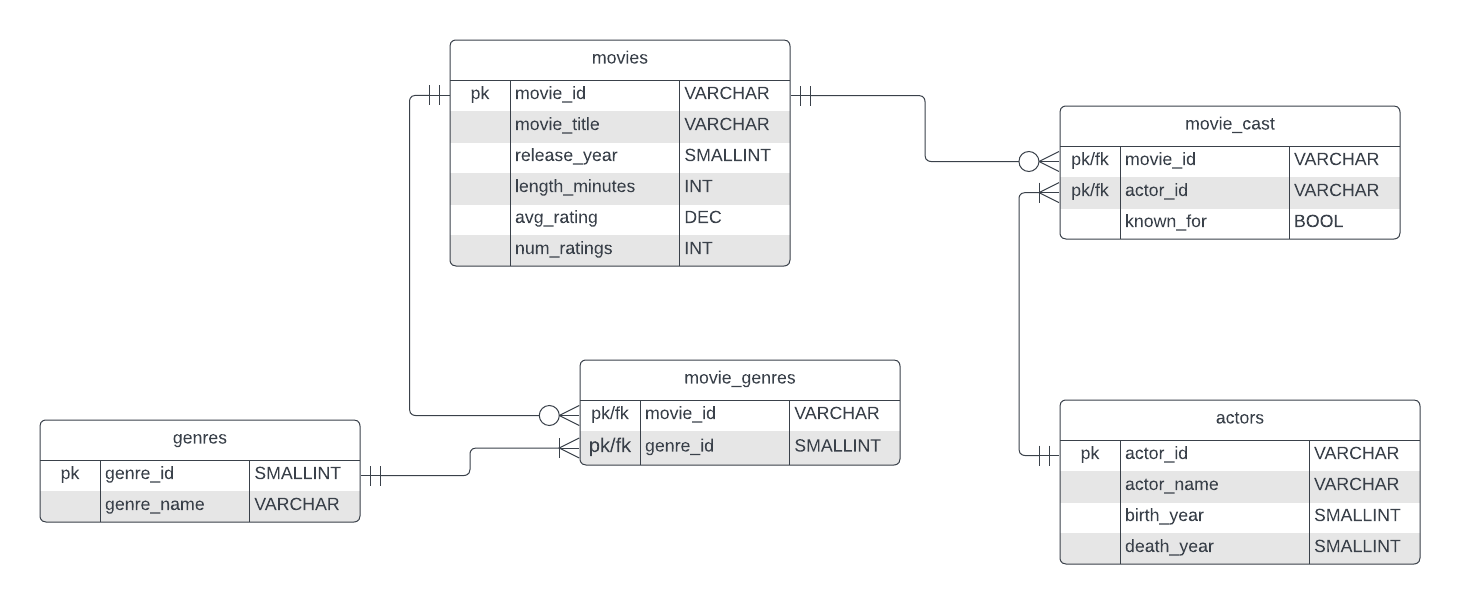

### Final Tables
The data validation and cleaning steps have been completed, resulting in the final tables represented as Pandas Dataframes. These Dataframes contain the processed and filtered data ready for further analysis and utilization.

#### movies

Contains all movies in IMDb database and relevant information about each movie.

__Original Tables:__ title.basics, title.ratings

__Dataframe:__ movies_eng_df

__Columns:__
- movie_id (string) - alphanumeric unique identifier of the movie
- movie_title (string) – title of movie
- release_year (integer) – year movie was released in YYYY format
- length_minutes (integer) – length of the movie in minutes
- avg_rating (float) - average rating out of film (out of 10) rounded to one decimal
- num_ratings (integer) - number of ratings a film has

In [190]:
movies_eng_df.head()

,movie_id,movie_title,release_year,length_minutes,avg_rating,num_ratings
0,tt0000009,Miss Jerry,1894,45,5.3,206
1,tt0000147,The Corbett-Fitzsimmons Fight,1897,100,5.3,475
2,tt0000574,The Story of the Kelly Gang,1906,70,6.0,832
3,tt0000591,The Prodigal Son,1907,90,4.4,20
4,tt0000615,Robbery Under Arms,1907,<NA>,4.3,24


#### actors

Stores information related to actors in movies.

__Original Table:__ name.basics

__DataFrame:__ actors_eng_df

__Columns:__

- alphanumeric unique identifier of the actor
- name (string) - name of actor
- birth_year (integer) - year person was born in YYYY format
- death_year (integer) - year person died, if applicable, in YYYY format

In [191]:
actors_eng_df.head()

,actor_id,actor_name,birth_year,death_year
0,nm0000001,Fred Astaire,1899,1987
1,nm0000002,Lauren Bacall,1924,2014
2,nm0000003,Brigitte Bardot,1934,<NA>
3,nm0000004,John Belushi,1949,1982
4,nm0000005,Ingmar Bergman,1918,2007


#### movie_cast

Mapping table between actors and movies tables identifying all actors in every movie.

__Original Table:__ title.principals

__Dataframe:__ movie_cast_eng_df

__Columns:__

- movie_id (string) - alphanumeric unique identifier of the movie
- actor_id (string) - alphanumeric unique identifier of the actor
- known_for (boolean) - indicates where the actor is well known for the role in the movie

In [192]:
movie_cast_eng_df.head()

,movie_id,actor_id,known_for
0,tt0000009,nm0063086,True
1,tt0000009,nm0183823,True
2,tt0000009,nm1309758,True
3,tt0000574,nm0846887,True
4,tt0000574,nm0846894,True


#### genres

Contains all distinct genres a movie can be tagged as.

__Original Table:__ title.basics (genres column)

__Dataframe:__ genres_eng_df

__Columns:__

- genre_id (integer) - integer unique identifier of genre
- genre_name (string) - name of the genre

In [196]:
genres_eng_df.head()

,genre_id,genre_name
0,1,Romance
1,2,Documentary
2,3,News
3,4,Sport
4,5,Action


#### movie_genres

Mapping table between movies and genres table identifying all genres a movie is tagged as movie.

__Original Table:__ title.basics (genres column)

__Dataframe:__ movie_genres_eng_df

__Columns:__

- movie_id (string) - alphanumeric unique identifier of the movie
- genre_id (integer) - integer unique identifier of genre

In [194]:
movie_genres_eng_df.head()

,movie_id,genre_id
0,tt0000009,1
1,tt0002423,1
2,tt0003022,1
3,tt0003442,1
4,tt0003595,1


### Export Tables as CSVs

The final versions of these files will be exported as CSVs to later be loaded into a PostgreSQL database.

In [39]:
# Folder to save all files under
root = "Database Data/"

# Dictionary to be used in loop
tables_dict = {
    "movies": movies_eng_df, 
    "actors": actors_eng_df, 
    "movie_cast": movie_cast_eng_df, 
    "genres": genres_eng_df, 
    "movie_genres": movie_genres_eng_df
}

In [40]:
# Loop to export as csv files
for table, df in tables_dict.items():
    df.to_csv(root + table + ".csv", index=False)